**CURSO**: Análisis Geoespacial, Departamento de Geociencias y Medio Ambiente, Universidad Nacional de Colombia - sede Medellín <br/>
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Classroom code**: [32cjlau] <br />
**Credits**: The content of this notebook is taken from several sources, mainly from [Introduction to phyton GIS](https://automating-gis-processes.github.io/CSC18/index.html). and the courses and book open and freely published by [Dani Arribas-Bel](http://darribas.org/) -  University of Liverpool & - Sergio Rey - [Center for Geospatial Sciences, University of California, Riverside](http://spatial.ucr.edu). Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# Importing spatial object data

In [2]:
x=2
y=3
print(x+y)

5


**edier**

[Geopandas](https://geopandas.org/)  is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

[Natural Earth](https://www.naturalearthdata.com/) is a GIS data package that has all the essential layers you need to create a map. For example, 
it has administrative, hydrographic, and general land information. This public domain map data was created by a group of volunteers and is supported by the North American Cartographic 
Information Society (NACIS).

The [requests library](https://realpython.com/python-requests/) is the de facto standard for making HTTP requests in Python. Once requests is installed, you can use it in your application. [HTTP](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol#Request_methods) methods such as GET and POST, determine which action you’re trying to perform when making an HTTP request. Besides GET and POST, there are several other common methods that you’ll use later in this tutorial. One of the most common HTTP methods is GET. The GET method indicates that you’re trying to get or retrieve data from a specified resource. To make a GET request, invoke requests.get(). To test this out, you can make a GET request to GitHub’s Root REST API by calling get() with the following URL:

In [ ]:
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'}  #https://developers.whatismybrowser.com/useragents/explore/software_name/chrome/
r = requests.get("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_map_units.zip", stream=True, headers=headers)
r

<Response [200]>

In this example, you’ve captured the return value of get(), which is an instance of Response, and stored it in a variable called *r*. You can now use *r* to see a lot of information about the results of your GET request. The response of a GET request often has some valuable information, known as a payload, in the message body. Using the attributes and methods of Response, you can view the payload in a variety of different formats.

To see the response’s content in bytes, you use .content:

In [ ]:
r.content

In this case the info obtained is a .zip file, then we need to import [zipfile](https://docs.python.org/3/library/zipfile.html) and [io](https://docs.python.org/3/library/io.html). The **io** module provides Python’s main facilities for dealing with various types of I/O. There are three main types of I/O: text I/O, binary I/O and raw I/O. These are generic categories, and various backing stores can be used for each of them. A concrete object belonging to any of these categories is called a file object. Other common terms are stream and file-like object. The **ZIP file** format is a common archive and compression standard. This module provides tools to create, read, write, append, and list a ZIP file.

In [ ]:
import zipfile, io
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("mundo")

In [ ]:
import geopandas as gpd
countries = gpd.read_file("mundo/ne_10m_admin_0_map_units.shp")
countries.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 map unit,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 map unit,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."


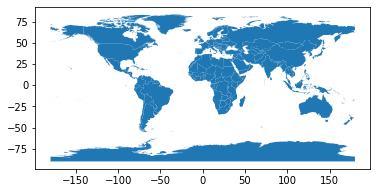

In [ ]:
countries.plot();

### From url

In [ ]:
countries1 = gpd.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip")
countries1.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."


<AxesSubplot:>

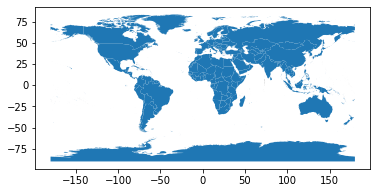

In [ ]:
countries1.plot()

### From shp

In [ ]:
countries2 = gpd.read_file("data/countries.shp")
countries2.head(2)

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."


<AxesSubplot:>

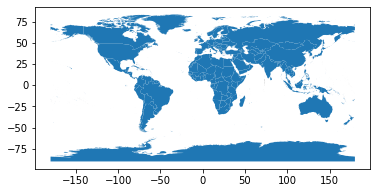

In [ ]:
countries2.plot()

### JSON & Geojson
[JSON](https://www.json.org/json-en.html) (JavaScript Object Notation) is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate. It is based on a subset of the JavaScript Programming Language Standard ECMA-262 3rd Edition - December 1999. JSON is a text format that is completely language independent but uses conventions that are familiar to programmers of the C-family of languages, including C, C++, C#, Java, JavaScript, Perl, Python, and many others. These properties make JSON an ideal data-interchange language.

JSON is built on two structures:

* A collection of name/value pairs. In various languages, this is realized as an object, record, struct, dictionary, hash table, keyed list, or associative array.
* An ordered list of values. In most languages, this is realized as an array, vector, list, or sequence.

[GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) is a format for encoding a variety of geographic data structures. GeoJSON supports the following geometry types: Point, LineString, Polygon, MultiPoint, MultiLineString, and MultiPolygon. Geometric objects with additional properties are Feature objects. Sets of features are contained by FeatureCollection objects.

[http://geojson.io/#map=2/20.0/0.0](http://geojson.io/#map=2/20.0/0.0)

In [ ]:
!pip install geojson

In [ ]:
berlin = gpd.read_file("data/berlin-districts.geojson")
berlin.head(2)

,district,district_group,median_price,geometry
0,Blankenfelde/Niederschönhausen,Pankow,37.5,"MULTIPOLYGON (((1493006.880 6912074.798, 14929..."
1,Helmholtzplatz,Pankow,58.0,"MULTIPOLYGON (((1493245.549 6900059.696, 14932..."


In [ ]:
type(berlin)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

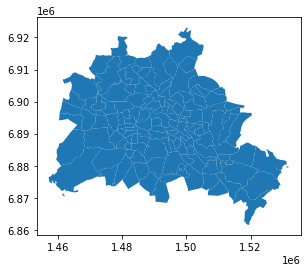

In [ ]:
berlin.plot()

In [ ]:
berlin.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Geojson from url

In [ ]:
uk = gpd.read_file("https://geographicdata.science/book/_downloads/860cf1380fe6cb15c80f882fad461a04/local_authority_districts.geojson")
uk.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    391 non-null    int64   
 1   lad16cd     391 non-null    object  
 2   lad16nm     391 non-null    object  
 3   lad16nmw    22 non-null     object  
 4   bng_e       391 non-null    int64   
 5   bng_n       391 non-null    int64   
 6   long        391 non-null    float64 
 7   lat         391 non-null    float64 
 8   st_areasha  391 non-null    float64 
 9   st_lengths  391 non-null    float64 
 10  geometry    391 non-null    geometry
dtypes: float64(4), geometry(1), int64(3), object(3)
memory usage: 33.7+ KB


<AxesSubplot:>

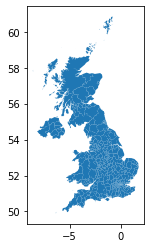

In [ ]:
uk.plot()

### Writing Data to Spatial Format.

It is not ideal to read your file and then convert it all the time. This will take time and computatin resources. So, let us convert the CSV data to Spatial format. This might take a while depending on computing resources and the size of the data.

* Write to Shapefile 

In [ ]:
uk.to_file("data/uk.shp", crs={'init' :'epsg:4326'})

* Write to GeoJSON

In [ ]:
countries2.sample(40).to_file("data/uk2.geojson", driver='GeoJSON')

In [ ]:
uk = gpd.read_file("data/uk2.geojson")
uk.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        40 non-null     object  
 1   POP_EST     40 non-null     int64   
 2   GDP_MD_EST  40 non-null     float64 
 3   POP_YEAR    40 non-null     int64   
 4   LASTCENSUS  40 non-null     int64   
 5   GDP_YEAR    40 non-null     int64   
 6   ECONOMY     40 non-null     object  
 7   INCOME_GRP  40 non-null     object  
 8   CONTINENT   40 non-null     object  
 9   REGION_UN   40 non-null     object  
 10  SUBREGION   40 non-null     object  
 11  geometry    40 non-null     geometry
dtypes: float64(1), geometry(1), int64(4), object(6)
memory usage: 3.9+ KB


## Geoservicios
Los geoservicios permiten el intercambio y acceso a la información geográfica publicada por los organismos o entidades productoras de información georreferenciada. Para la publicación de geoservicios se utilizan los lenguajes y protocolos estándar definidos por el **Open Geospatial Consortium (OGC)**. El OGC busca la definición de estándares abiertos e interoperables dentro de los Sistemas de Información Geográfica (SIG) y de la World Wide Web (WWW), todo ello con el objetivo de facilitar el intercambio de información geográfica.

Entre los estándares de geoservicios más populares se tienen los siguientes:

- **WMTS** (Web Map Tile Service): Es un estándar optimizado para la visualización eficiente de mapas a través de internet.
- **WMS** (Web Map Service): Estándar para la visualización de mapas a través de internet. En este caso un mapa no consiste en los propios datos, sino en una imagen de los mismos.
- **WFS** (Web Feature Service): Estándar que permite la descarga de datos geográficos en formato vectorial. 

<center><img src="https://miro.medium.com/max/2400/1*OvBZQR8cwZCd9rghXfGpfg.png" width="1000"></center>

In [ ]:
# instalar 
!pip install OWSLib

     |████████████████████████████████| 203 kB 969 kB/s eta 0:00:01


In [ ]:
from owslib.wms import WebMapService
igac = WebMapService('http://geocarto.igac.gov.co/geoservicios/quinientos_mil/wms', version='1.1.1')
print (igac.identification.type)
print (igac.identification.title)

OGC:WMS
WMS:OGC Instituto Geográfico Agustín Codazzi -IGAC- Subdirección de Geografía y Cartografía


In [ ]:
wms = WebMapService('http://gw-geoportal-test.igac.gov.co/cartografia500k/wms')
print (wms.identification.type)
print ( wms.identification.title)


OGC:WMS
Geoportal IGAC - Servicios de Mapas - Subdirección de Cartografía - Escala 500k



Listar las capas publicadas en el servicio WMS

In [ ]:
list(wms.contents)

['cartografia_500k',
 'administrativo_p',
 'aeropuerto_r',
 'banco_arena',
 'bosque',
 'canal_sencillo',
 'cienaga',
 'construccion_p',
 'curva_nivel',
 'drenaje_doble',
 'drenaje_sencillo',
 'embalse',
 'hito_limite',
 'isla',
 'laguna',
 'linea_costera',
 'pantano',
 'pista_aterrizaje_l',
 'puente_l',
 'puente_p',
 'puerto_p',
 'red_alta_tension',
 'tunel',
 'via_ferrea',
 'via_tipo1',
 'via_tipo2',
 'via_tipo3',
 'via_tipo4',
 'via_tipo5',
 'via_tipo6']

In [ ]:
print(  wms['cartografia_500k'].title )
print(  wms['cartografia_500k'].queryable )
print(  wms['cartografia_500k'].opaque )
print(  wms['cartografia_500k'].boundingBox )
print(  wms['cartografia_500k'].boundingBoxWGS84)
print(  wms['cartografia_500k'].crsOptions)
print(  wms['cartografia_500k'].styles)

Cartografía Base Escala 1:500.000 (Grupo de Capas)
1
0
(-10018754.171394622, -1345708.4084091098, -6456530.466009867, 2511525.234845713, 'EPSG:3857')
(-90.0, -12.0, -58.0, 22.0)
['EPSG:4326', 'EPSG:900913', 'EPSG:3857']
{'default': {'title': 'default', 'legend': 'http://gw-geoportal-test.igac.gov.co/cartografia500k/wms?format=image%2Fpng&layer=cartografia_500k&sld_version=1.1.0&request=GetLegendGraphic&service=WMS&version=1.1.1&styles='}}



Obtener imagen desde el servicio WMS

In [ ]:
img = wms.getmap(   layers=['cartografia_500k'],
                    styles=[''],
                     srs='EPSG:4326',
                     bbox=(-74.5684,	4.4181,	-73.9964,	4.852),
                     size=(640, 480),
                     format='image/png',
                     transparent=True
                     )
out = open('jpl_mosaic_visb.jpg', 'wb')
out.write(img.read())
out.close()

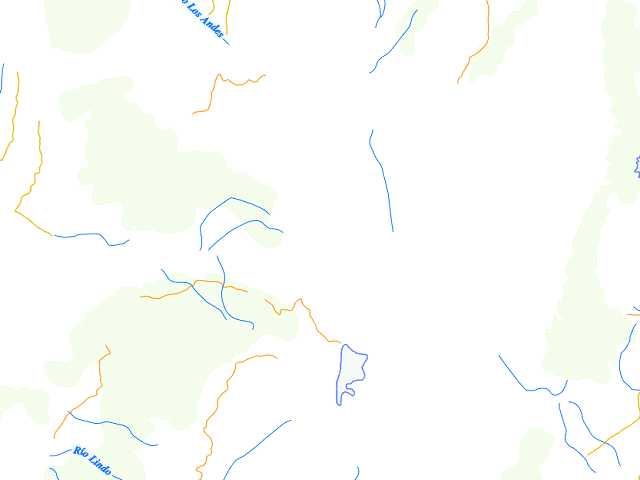

In [ ]:
from IPython.display import Image
Image('jpl_mosaic_visb.jpg')

In [ ]:
from owslib.wfs import WebFeatureService
wfs11 = WebFeatureService(url='http://geoserv.weichand.de:8080/geoserver/wfs', version='1.1.0')
wfs11.identification.title

'INSPIRE WFS 2.0 DemoServer Verwaltungsgrenzen Bayern'

In [ ]:
list(wfs11.contents)

['bvv:gmd_ex', 'bvv:bayern_ex', 'bvv:lkr_ex', 'bvv:regbez_ex', 'bvv:vg_ex']

## API (Aplication Programming Interface)
An [API](https://codeburst.io/the-art-of-accessing-apis-bf1a25338fac) (or ‘Application Programming Interface’) is an intermediary software that allows for communication between two applications. There are a bunch of [free public APIs](https://github.com/public-apis/public-apis#geocoding). Most APIs will require you to register for an API key and use this as an identifier for every call that you make to the API. Secondly, API owners sometimes enforce a limit on the number of requests that can be made to the API in a given time-frame in order to prevent users from overwhelming the service. This is called a ‘rate-limit’, and it varies from API to API.

In [ ]:
import requests

url = "https://swapi.dev/api/people/"

response = requests.get(url, params={"name": "r2-d2"}
)
data = response.json()
print(data['results'])

[{'name': 'Luke Skywalker', 'height': '172', 'mass': '77', 'hair_color': 'blond', 'skin_color': 'fair', 'eye_color': 'blue', 'birth_year': '19BBY', 'gender': 'male', 'homeworld': 'http://swapi.dev/api/planets/1/', 'films': ['http://swapi.dev/api/films/1/', 'http://swapi.dev/api/films/2/', 'http://swapi.dev/api/films/3/', 'http://swapi.dev/api/films/6/'], 'species': [], 'vehicles': ['http://swapi.dev/api/vehicles/14/', 'http://swapi.dev/api/vehicles/30/'], 'starships': ['http://swapi.dev/api/starships/12/', 'http://swapi.dev/api/starships/22/'], 'created': '2014-12-09T13:50:51.644000Z', 'edited': '2014-12-20T21:17:56.891000Z', 'url': 'http://swapi.dev/api/people/1/'}, {'name': 'C-3PO', 'height': '167', 'mass': '75', 'hair_color': 'n/a', 'skin_color': 'gold', 'eye_color': 'yellow', 'birth_year': '112BBY', 'gender': 'n/a', 'homeworld': 'http://swapi.dev/api/planets/1/', 'films': ['http://swapi.dev/api/films/1/', 'http://swapi.dev/api/films/2/', 'http://swapi.dev/api/films/3/', 'http://swa

In [ ]:
base_url = "https://api.themoviedb.org/3/search/movie"
api_key = 'your api key'

response = requests.get(
    url,
    params={
        "api_key": api_key,
        "query": "Harry Potter"
    }
)

data = response.json()
print(data['results'])

[{'name': 'Luke Skywalker', 'height': '172', 'mass': '77', 'hair_color': 'blond', 'skin_color': 'fair', 'eye_color': 'blue', 'birth_year': '19BBY', 'gender': 'male', 'homeworld': 'http://swapi.dev/api/planets/1/', 'films': ['http://swapi.dev/api/films/1/', 'http://swapi.dev/api/films/2/', 'http://swapi.dev/api/films/3/', 'http://swapi.dev/api/films/6/'], 'species': [], 'vehicles': ['http://swapi.dev/api/vehicles/14/', 'http://swapi.dev/api/vehicles/30/'], 'starships': ['http://swapi.dev/api/starships/12/', 'http://swapi.dev/api/starships/22/'], 'created': '2014-12-09T13:50:51.644000Z', 'edited': '2014-12-20T21:17:56.891000Z', 'url': 'http://swapi.dev/api/people/1/'}, {'name': 'C-3PO', 'height': '167', 'mass': '75', 'hair_color': 'n/a', 'skin_color': 'gold', 'eye_color': 'yellow', 'birth_year': '112BBY', 'gender': 'n/a', 'homeworld': 'http://swapi.dev/api/planets/1/', 'films': ['http://swapi.dev/api/films/1/', 'http://swapi.dev/api/films/2/', 'http://swapi.dev/api/films/3/', 'http://swa

### Earthquake Catalog
This is an implementation of the [FDSN Event Web Service](http://www.fdsn.org/webservices/FDSN-WS-Specifications-1.0.pdf) Specification, and allows custom searches for earthquake information using a variety of parameters.

In [ ]:
#parameters for the API using start and end dates
#Boundary for PR region
minlat = '0'
maxlat = '12'
minlon = '-78'
maxlon = '-74'

#date ranges 
sd = '2020-01-01T00:00:00'
ed = '2020-12-10T23:59:59'

#url 
url = ('https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&minlatitude='+ 
      minlat +'&maxlatitude='+ maxlat + '&minlongitude=' + minlon + '&maxlongitude=' + 
      maxlon + '&starttime=' + sd + '&endtime='+ ed)
#extract data
req = requests.get(url)
eq_data = req.json()

In [ ]:
print(url)

https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&minlatitude=0&maxlatitude=12&minlongitude=-78&maxlongitude=-74&starttime=2020-01-01T00:00:00&endtime=2020-12-10T23:59:59


In [ ]:
eq_data

## Geolocation

### Geopy

Geopy es solo una biblioteca que proporciona estas implementaciones para muchos servicios diferentes en un solo paquete, por tanto los diferentes servicios tienen diferentes Términos de uso, cuotas, precios, geodatabases, etc. Ej:  **Nominatim** es gratuito, pero ofrece límites de solicitud bajos. 

Each geolocation service you might use, such as Google Maps, Bing Maps, or Nominatim, has its own class in geopy.geocoders abstracting the service’s API. Geocoders each define at least a geocode method, for resolving a location from a string, and may define a reverse method

Geocoding: find locations on Earth by name and address

### Nominatim 
[Nominatim](https://nominatim.org/) is a tool to search OSM (Open street map) data by name and address and to generate synthetic addresses of OSM points (reverse geocoding).

[Info](https://geopy.readthedocs.io/en/stable/#nominatim)

Parámetros de interés en Nominatim: 

* Timeout (int) - Tiempo de espera para encontrar cada query

* user_agent (str) – is an http request header that is sent with each request. Nominatim requires this value to be set to your application name. The goal is to be able to limit the number of requests per application. *email=< valid email* address > If you are making large numbers of request please include a valid email address or alternatively include your email address as part of the User-Agent string. This information will be kept confidential and only used to contact you in the event of a problem, see Usage Policy for more details. **OJO! hay que colocar algo distinto a user_agent!!!**

* Query (dict or str) – The address, query or a structured query you wish to geocode. Structure: a dictionary whose keys are one of: street=<housenumber> <streetname>, city, county, state, country, or postalcode.

* exactly_one (bool) – Return one result or a list of results, if available.

* language (str) – Preferred language in which to return results. En este caso es 'es'

* country_codes (str or list) – Limit search results to a specific country (or a list of countries) using ISO 3166-1alpha2 code. En este caso es: 'col'

* featuretype (str) – If present, restrict results to certain type of features. Allowed values: country, state, city, settlement.

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(user_agent="edieraristizabal@gmail.com")

In [ ]:
geolocator.geocode("Medellín").raw 

{'place_id': 258604735,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 1343264,
 'boundingbox': ['6.1670811', '6.3764208', '-75.7193741', '-75.4734083'],
 'lat': '6.2443382',
 'lon': '-75.573553',
 'display_name': 'Medellín, Valle de Aburrá, Antioquia, Región Andina, 0500, Colombia',
 'class': 'boundary',
 'type': 'administrative',
 'importance': 0.7034777156602727,
 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_administrative.p.20.png'}

In [ ]:
geolocator.geocode("Antonio José (La Meseta),Antioquia").raw #Ojo con los paréntesis

{'place_id': 57858984,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 4955653252,
 'boundingbox': ['6.0261502', '6.0661502', '-75.7980612', '-75.7580612'],
 'lat': '6.0461502',
 'lon': '-75.7780612',
 'display_name': 'Antonio José, Titiribí, Suroeste, Antioquia, Región Andina, Colombia',
 'class': 'place',
 'type': 'village',
 'importance': 0.5850000000000001,
 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_place_village.p.20.png'}

In [ ]:
geolocator.geocode('El Líbano,Antioquia,Colombia', exactly_one=False)

[Location(El Libano, Remedios, Nordeste, Antioquia, Región Andina, Colombia, (7.0145933, -74.6353484, 0.0)),
 Location(El Libano, Ituango, Norte, Antioquia, Región Andina, 052050, Colombia, (7.0991049, -75.73034, 0.0)),
 Location(Carrera 44, El Santuario, Oriente, Antioquia, Región Andina, 054450, Colombia, (6.1383938, -75.2615333, 0.0))]

In [ ]:
dato = geolocator.geocode("carrera 11 #82 - 71, Bogotá, Colombia")
dato

Location(Carrera 11, Carmen del Sol, UPZ Marco Fidel Suárez, Localidad Rafael Uribe Uribe, Bogotá, Bogotá Distrito Capital, Región Andina, 111821, Colombia, (4.5640547, -74.1102259, 0.0))

In [ ]:
type(dato)

geopy.location.Location

In [ ]:
print(dato.latitude,dato.longitude)

4.5640547 -74.1102259


In [ ]:
location = geolocator.reverse("4.5640547, -74.1102259")
location

Location(Carrera 11, Carmen del Sol, UPZ Marco Fidel Suárez, Localidad Rafael Uribe Uribe, Bogotá, Bogotá Distrito Capital, Región Andina, 111821, Colombia, (4.5640547, -74.1102259, 0.0))

### Google Maps API

La librería Request funciona como intermediario entre la aplicación y la API de Google Maps, haciendo las solicitudes de ubicación

La solicitud que se le realiza a Google Maps tiene la forma:
  https://maps.googleapis.com/maps/api/geocode/outputFormat?parameters

- Las respuestas de la solicitud se devuelven en el formato indicado por la outputFormat.

- Los parámetros se pasan en JSON, y son principalmente 2: api_key y address (ubicación que quiero buscar)

La respuesta se obtiene de la forma 
https://maps.googleapis.com/maps/api/geocode/json?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA&key=YOUR_API_KEY

y retorna un objeto JSON

To get the API key, we need to first login to [Google Developer Account](https://console.developers.google.com/) with your Google account email and password. The next step is to create the billing account for Google to charge the usage of the API. For creating the billing account go to the menu on the top left of your Google Developer Account homepage, then Billing section and then Add Billing Account. Provide your billing details and choose Google Maps Platform to finalize the creation of the account. A 200 dollars Google Maps Platform credit is available each month so if you do more than 40,000 requests per month I’d suggest you to check the pricing details. We also need to create a new project. Click on Select Project on the top bar and then New Project on the top left of the window. Now that we have our billing account and project we need to enable the API for the project. Access the project that you have just created and click on Enable APIs and Services. Search for Geocoding API and click on Enable.

<center><img src="https://miro.medium.com/max/700/1*l1MjfkReJLhqnMDyJwgz_w.jpeg" width="600"></center>

The last thing we need to do is creating the API key and to do so we just need to go to the Credentials tab, click on Create Credentials and then API Key. Copy the API Key since we are going to use it in the next steps.

In [ ]:
import requests

#Si se tiene una API_KEY, entonces hay que remplazarla en <api_key>
f = open("google_token.txt", "r")
api_key = f.read()

In [ ]:
# Esta es una estrategia para generar una api_key sin necesidad de ingresar los datos y la targeta de crédito que solicita Google Maps Platform
api_key = api_key

if api_key is False: #En el caso que no tengas Api key, usas el api_key =42 e ingresas por un link externo al de google, el cual cumple la misma función
    api_key = 42
    serviceurl = 'http://py4e-data.dr-chuck.net/json?'
else : #En el caso que tengas api, utiliza el link de google api. 
    serviceurl = 'https://maps.googleapis.com/maps/api/geocode/json?'

In [ ]:
serviceurl

'https://maps.googleapis.com/maps/api/geocode/json?'

In [ ]:
def location(ubicacion):

    params= {'key': api_key , 'address': ubicacion}
    
    response = requests.get(serviceurl, params=params).json()

    print(response)
    
    response.keys()

    if response['status'] == 'OK':

        geometry= response['results'][0]['geometry']
        latitud= geometry['location']['lat']
        longitud= geometry['location']['lng']
    else:
        return "No fue exitoso el request"

        
    return [latitud, longitud, geometry]

In [ ]:
s= location("carrera 11 #82 - 71, Bogotá, Colombia")
print(s)

[4.666848, -74.05257259999999, {'location': {'lat': 4.666848, 'lng': -74.05257259999999}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 4.668196980291502, 'lng': -74.05122361970848}, 'southwest': {'lat': 4.665499019708498, 'lng': -74.0539215802915}}}]


In [ ]:
location("carrera 70 # 44-13, Medellin")

{'results': [{'address_components': [{'long_name': '4413', 'short_name': '4413', 'types': ['street_number']}, {'long_name': 'Carrera 70', 'short_name': 'Cra. 70', 'types': ['route']}, {'long_name': 'Naranjal', 'short_name': 'Naranjal', 'types': ['neighborhood', 'political']}, {'long_name': 'Medellín', 'short_name': 'Medellín', 'types': ['locality', 'political']}, {'long_name': 'Medellín', 'short_name': 'Medellín', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Antioquia', 'short_name': 'Antioquia', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'Colombia', 'short_name': 'CO', 'types': ['country', 'political']}, {'long_name': '050031', 'short_name': '050031', 'types': ['postal_code']}], 'formatted_address': 'Cra. 70 #44-13, Medellín, Antioquia, Colombia', 'geometry': {'location': {'lat': 6.2494535, 'lng': -75.5889572}, 'location_type': 'RANGE_INTERPOLATED', 'viewport': {'northeast': {'lat': 6.250802480291502, 'lng': -75.5876082197085}, 'sou

[6.2494535,
 -75.5889572,
 {'location': {'lat': 6.2494535, 'lng': -75.5889572},
  'location_type': 'RANGE_INTERPOLATED',
  'viewport': {'northeast': {'lat': 6.250802480291502,
    'lng': -75.5876082197085},
   'southwest': {'lat': 6.248104519708497, 'lng': -75.5903061802915}}}]

## Aditional sources

* [Introduction to Importing Data in Python](https://www.datacamp.com/courses/importing-data-in-python-part-1)